In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to fit CNN input
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode the labels (0–9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.8731 - loss: 0.4621 - val_accuracy: 0.9783 - val_loss: 0.0812
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9786 - loss: 0.0745 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9870 - loss: 0.0458 - val_accuracy: 0.9875 - val_loss: 0.0473
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9898 - loss: 0.0348 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9852 - val_loss: 0.0539


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9798 - loss: 0.0574
Test Accuracy: 0.98


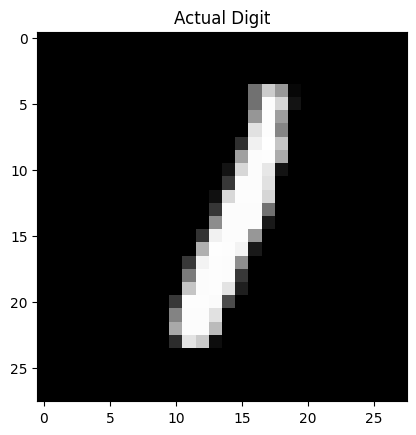

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Digit: 1


In [ ]:
image_index = 5431  # Change this to test other digits

plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.title("Actual Digit")
plt.show()

pred = model.predict(np.array([x_test[image_index]]))
print("Predicted Digit:", np.argmax(pred))